#1. Objective
The objective of this project to figure out whether insuarer's sex, smoking habbits, location BMI( Body Mass Index), the number of childeren are statistically significant in terms of using insurance. As our target variable is continous we can not use supervised machine learning tools for classification. We will use only Ordinary Least Square (OLS) to determine our target variable - Insurance charges.

Ideally, we need data is extracted randomly, but in this data consists only people who already used insurances. It is taken purposely from clusters of customers who used insurances from databaes.



#2.Data
The data was taken from Kaggle.

In [225]:
# First we need mount drive by following code
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [226]:
# Importing important library for reading CSV files as a table.
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [227]:
df = pd.read_csv('drive/MyDrive/Data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 3.EDA


In statistics, exploratory data analysis (EDA) is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling and thereby contrasts traditional hypothesis testing. Exploratory data analysis has been promoted by John Tukey since 1970 to encourage statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments.

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [229]:
# Missing Values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Each variable have 1338 observations indicating there is no missing values in the data. 'Sex', 'Smoker', 'Region' variables are not numerical and will not be described in the foloowing code.



In [230]:
# Number of unique data for each feature
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [231]:
# Unique regions in data
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [232]:
# The description of numerical variables
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Annual charges:
According above table, average charge is 13,270.42 per year. Max charge is observed in the amount of $63,770.42 which brings mean value up compare to median value of 9,382.03. It means that half of people used insurances of 9382.03.

If BMI:
*   < 18.5 Underweight
*   18.5 - 24.9 Normal weight
*   24.9 - 29.99 Overweight
*   30 - 39.99 Obese

Mean and median BMI are 30.66 and 30.40 respectively, which means are very high with obese status. Everyrhing looks normal, min & max values are in acceptable range - nothing extraordinary.

Children and Age variables looks normal too. This data is already cleaned data. 

#4.Data Visualisation

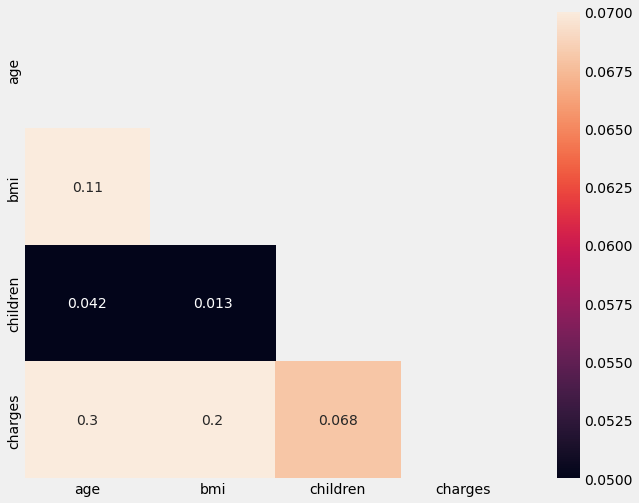

In [233]:
corr = df.corr()
plt.figure(figsize=(10,8))
matrix = np.triu(corr)
sb.heatmap(corr, annot = True, mask = matrix, vmin = 0.05, vmax = 0.07)
plt.show()

The heatmap shows that there is correlation between age and chagres, but there is less correlation compare to BMI. We need to note that there is positive correlation between charges and all other variables.

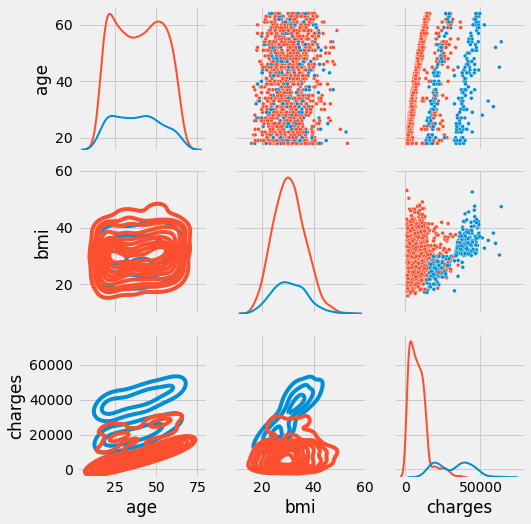

In [234]:
r = sb.PairGrid(df[['age', 'bmi', 'smoker','charges']], hue = 'smoker', diag_sharey=False)
r.map_upper(sb.scatterplot, s=15)
r.map_lower(sb.kdeplot)
r.map_diag(sb.kdeplot, lw=2)

As it is shawn above, the smoker(blue dots) have more charges than non-smoker. BMI and Age variables if we compare in terms of smoking, there is not clear cluster to interpret.

#5.Data Preprocessing

##5.1 Dublicates


In [235]:
dup = df.duplicated()
dup.sum()

1

As we see from above code, we have a duplicate in our data. We need to drop it.

In [236]:
df.drop_duplicates(keep=False, inplace=True)

In [237]:
dup = df.duplicated()
dup.sum()

0

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1336 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1336 non-null   int64  
 1   sex       1336 non-null   object 
 2   bmi       1336 non-null   float64
 3   children  1336 non-null   int64  
 4   smoker    1336 non-null   object 
 5   region    1336 non-null   object 
 6   charges   1336 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.5+ KB


The number of observations dropped from 1338 to 1336, so 2 dublicated values dropped.

##5.2 Data Encoding

In [239]:
# Defining our dependent and independent variables
Y = df['charges'] # Our dependent variable
X = df.drop(['charges'], axis=1) # Independent variables. We drop dependent variable thus the rest is independent
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [240]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


The machine learning cannot use objects to compute. That is why we need to change these categorical variables to numerical. There are multiple ways to do that such as df.replace, but we will use encoding today as it is more automated.

In [241]:
# Encoding region, smoker and sex variables
X.smoker = X.smoker.eq('yes').mul(1)
X.sex = X.sex.eq('female').mul(1)
region = list(X.select_dtypes(include = ['object'])) # Here we use one_hot coding to create dummy variables of each region.
X = pd.get_dummies(X,columns=region) # It shows 1 if customer located in designated region.
X.head()


,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,0,0,0,1
1,18,0,33.770,1,0,0,0,1,0
2,28,0,33.000,3,0,0,0,1,0
3,33,0,22.705,0,0,0,1,0,0
4,32,0,28.880,0,0,0,1,0,0


##5.3 Outliers

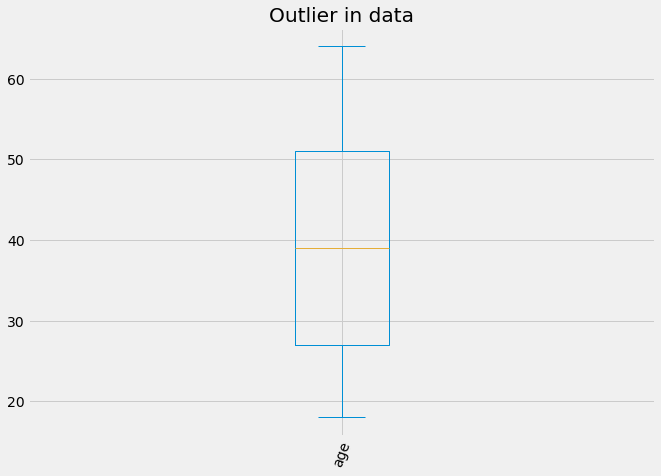

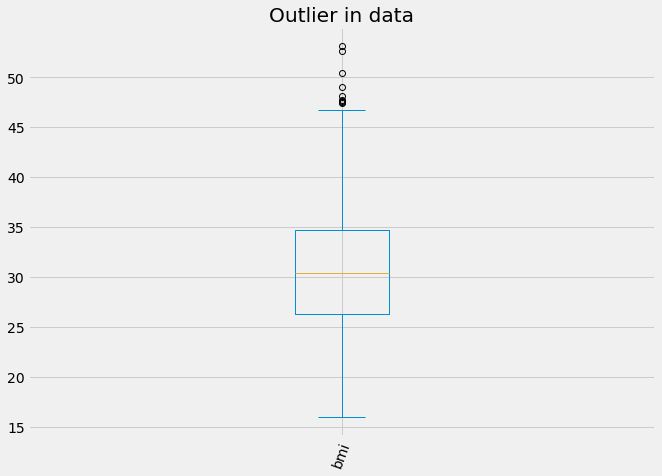

In [242]:
plt.style.use('fivethirtyeight')
outlier= X[['age']].plot(kind='box',figsize=(10,7));
plt.xticks(rotation=70);
plt.title('Outlier in data');

plt.style.use('fivethirtyeight')
outlier= X[['bmi']].plot(kind='box',figsize=(10,7));
plt.xticks(rotation=70);
plt.title('Outlier in data');

We are not going to treat outlier in this project as there is no extreme observations in this dataset. The size of data is small, we do not want to drop extra observations.

##5.4 Transforming data to NumPy arrays

In [243]:
# Transforming selected feature to NumPy
X = np.asarray(X)
X[0:5]

array([[19.   ,  1.   , 27.9  ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,
         1.   ],
       [18.   ,  0.   , 33.77 ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ],
       [28.   ,  0.   , 33.   ,  3.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ],
       [33.   ,  0.   , 22.705,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ],
       [32.   ,  0.   , 28.88 ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ]])

In [244]:
Y = np.asarray(Y)
Y[0:5]

array([16884.924  ,  1725.5523 ,  4449.462  , 21984.47061,  3866.8552 ])

## 5.5 Training data

In [245]:
# Splitting our data to Train and Test
from sklearn.model_selection import train_test_split # Importing important library for splitting data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (1068, 9) (1068,)
Test set: (268, 9) (268,)


## 5.6 Standadasing Data

In [246]:
# We need to standardise features
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X) # Here we make mean and variance data observations 0 and 1 respectively. 
X[0:5]

array([[-1.44207691,  1.00902274, -0.45299913, -0.90985593,  1.96873371,
        -0.56582515, -0.56467237, -0.61195228,  1.76373729],
       [-1.51333536, -0.99105794,  0.50922212, -0.08011701, -0.50794071,
        -0.56582515, -0.56467237,  1.63411434, -0.56697786],
       [-0.80075085, -0.99105794,  0.38300229,  1.57936084, -0.50794071,
        -0.56582515, -0.56467237,  1.63411434, -0.56697786],
       [-0.44445859, -0.99105794, -1.30457313, -0.90985593, -0.50794071,
        -0.56582515,  1.77093843, -0.61195228, -0.56697786],
       [-0.51571704, -0.99105794, -0.29235572, -0.90985593, -0.50794071,
        -0.56582515,  1.77093843, -0.61195228, -0.56697786]])

#6.Model Evaluation

##6.1 OLS Statsmodel Regression

In [248]:
#OLS statsmodel regression
from statsmodels.stats import diagnostic

import statsmodels.api as sm
model = sm.OLS(Y, X).fit()
#predictions = model.predict(x_test) 

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.340
Model:                            OLS   Adj. R-squared (uncentered):              0.336
Method:                 Least Squares   F-statistic:                              85.68
Date:                Tue, 02 Aug 2022   Prob (F-statistic):                   1.89e-114
Time:                        18:42:30   Log-Likelihood:                         -14706.
No. Observations:                1336   AIC:                                  2.943e+04
Df Residuals:                    1328   BIC:                                  2.947e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

1. t values:
x1 - age, x3 - BMI, x5 - smoker variable are statistically significant as t values are greater than 1.96 according z-score table.
2. R - squered:
R-squared is 0.34, which is lower than normal value of 0.7. It means that the variance of dependent variable is poorly explaioned by the variance of independent variables.
3. P values:
If P value is bigger than 0.05, it means that our coefficent is not statistically significant.
4. F-Statistics:
It measures whether all variables are statistically significant. As it is around 85, it means independent variables are sgnificatn to determine our target variable.

5. Skew:
It measures normality. Here skew value is 1.21.In a positive skew, the tail of a distribution curve is longer on the right side. Normal distribution skewness equals 0. 
6. Kurtosis: 
 In kurtosis, we measure heavily the tails of a distribution differ from the tails of a normal distribution. Kurtosis of normal distribution is 3, but we have 5.6 here. It means our data has heavier tails than normal distribution.
7. Durbin - Watson:
Measure of Autocorrelation.
Null Hypothesis: No first order correlation.
The Durbin-Watson statistic will always have a value between 0 and 4.
A value of 2.0 means that there is no autocorrelation detected in the sample.
Values from 0 to less than 2 indicate positive autocorrelation 
and values from 2 to 4 indicate negative autocorrelation. In our case, Durbin - watson is 0.35, which means there is not autocorrelation.